Analyzing Trending Tags of Youtube(USvideos)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
videos = pd.read_csv('F:\PRACTICE\Dataset/USvideos.csv', error_bad_lines=False)

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


In [3]:
videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [4]:
tags_complete = ' '.join(videos['tags']) #join by spaces

In [5]:
tags_complete

"logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lighting|A11 Bionic|augmented reality|emoji|animoji|Face ID|Apple Pay|camera|smartphone [none] apple iphone x hands on|Apple iPhone X|iPhone X|apple iphone x first look|iPhone X first look|apple iphone x event 2017|apple iphone x event|iPhone X price|iPhone X specs|iPhone X design|iPhone X camera|iPhone X home button|iPhone X wireless charging|iPhone X waterproof|iPhone X release date|iphone 2017|apple|iphone|ios 11|the verge|verge jacksfilms|parody|parodies|iphone|iphone x|iphone 8|apple|emoji a24|a24 films|a24 trailers|independent films|trailer|HD|official|movie|film|a24 movies|oscar 

In [17]:
import re # regular expressions

In [18]:
tags = re.sub('[^a-zA-Z]', ' ', tags_complete) #substituting any tag that is not a-z and A-Z

In [19]:
tags

'logan paul vlog logan paul logan paul olympics logan paul youtube vlog daily comedy hollywood parrot maverick bird maverick clothes diamond play button logan paul diamond play button   M subscribers logan paul   year vlogging   year vlog dwarf mamba play button logan paul history youtube history   M   M plaque youtube button diamond button logang logang   life Apple iPhone    iPhone Ten iPhone Portrait Lighting A   Bionic augmented reality emoji animoji Face ID Apple Pay camera smartphone  none  apple iphone x hands on Apple iPhone X iPhone X apple iphone x first look iPhone X first look apple iphone x event      apple iphone x event iPhone X price iPhone X specs iPhone X design iPhone X camera iPhone X home button iPhone X wireless charging iPhone X waterproof iPhone X release date iphone      apple iphone ios    the verge verge jacksfilms parody parodies iphone iphone x iphone   apple emoji a   a   films a   trailers independent films trailer HD official movie film a   movies oscar 

In [8]:
tags = re.sub(' +', ' ', tags) # removing extra space between tags

In [9]:
from wordcloud import WordCloud, STOPWORDS

In [20]:
wordcloud = WordCloud(width = 1000, height = 500, stopwords = set(STOPWORDS)).generate(tags)

(-0.5, 999.5, 499.5, -0.5)

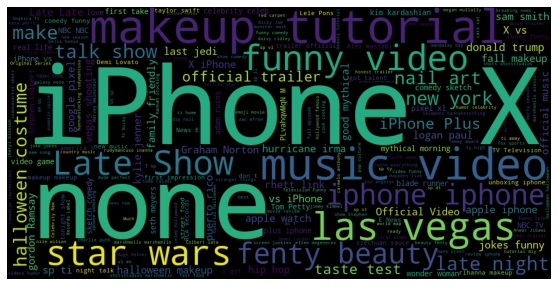

In [11]:
plt.figure(figsize = (15, 5))
plt.imshow(wordcloud)
plt.axis('off')

Perform Analysis on; likes, views and dislikes, and find how they are co-related with each other.

Text(0.5, 1.0, 'Regression Plot of Views and Likes')

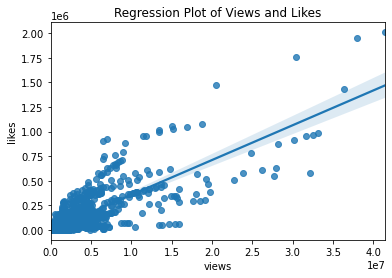

In [12]:
sns.regplot(data = videos, x = 'views', y = 'likes')
plt.title('Regression Plot of Views and Likes')

Text(0.5, 1.0, 'Regression Plot of Views and Disikes')

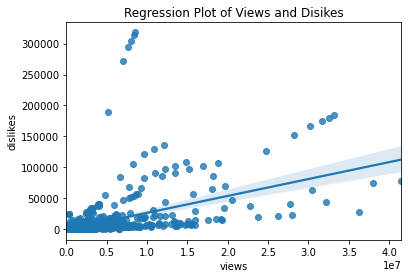

In [13]:
sns.regplot(data = videos, x = 'views', y = 'dislikes')
plt.title('Regression Plot of Views and Disikes')

Correlation Matrix

In [14]:
df_corr = videos[['views', 'likes', 'dislikes']]

In [15]:
df_corr.corr() # correlation

,views,likes,dislikes
views,1.000000,0.832844,0.541955
likes,0.832844,1.000000,0.497439
dislikes,0.541955,0.497439,1.000000


There is a strong direct(positive) correlation of 0.833 between views and likes.
There is an intermediate direct correlation of 0.542 between views and dislikes.

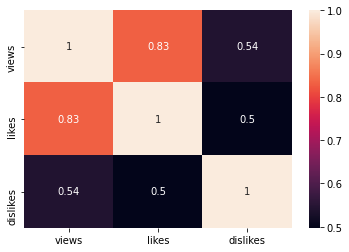

In [16]:
sns.heatmap(df_corr.corr(), annot = True)

View and Likes have the stongest correlation of 0.83.